Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [1]:
!pip install pymystem3


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import re

In [3]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [7]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

In [8]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [9]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [10]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [11]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [12]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [13]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [14]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [15]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [16]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [17]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [18]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [19]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [20]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [22]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [21]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [22]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [23]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [24]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [25]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [26]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [27]:
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_rus[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_rus')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_rus[0m

  Searched in:
    - 'C:\\Users\\Admin/nltk_data'
    - 'c:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'c:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'c:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


Можно "подклеить" для удобства тэги к слову.

In [28]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['I_PRP', 'love_VBP', 'cats_NNS', '._.']


In [29]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

Файл успешно прочитан. Длина текста: 3571 символов
Тип переменной text_string: <class 'str'>


'A Day in the Life of a University Student\nThe shri'

In [30]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

A_DET Day_NOUN in_ADP the_DET Life_NOUN of_ADP a_DET University_NOUN Student_NOUN The_DET shrill_NOUN sound_NOUN of_ADP my_PRON alarm_NOUN pierces_NOUN through_ADP the_DET darkness_NOUN at_ADP 6:30_NUM AM_NOUN ._. I_PRON groan_VERB and_CONJ reach_VERB for_ADP my_PRON phone_NOUN ,_. hitting_VERB snooze_ADJ one_NUM more_ADJ time—a_ADJ daily_ADJ ritual_NOUN that_DET buys_VERB me_PRON those_DET precious_ADJ ten_ADJ minutes_NOUN of_ADP extra_ADJ sleep_NOUN ._. When_ADV I_PRON finally_ADV drag_VERB myself_PRON out_ADP of_ADP bed_NOUN ,_. the_DET small_ADJ dorm_NOUN room_NOUN is_VERB still_ADV dark_ADJ ,_. my_PRON roommate_NOUN 's_PRT gentle_ADJ snoring_VERB a_DET reminder_NOUN that_ADP not_ADV everyone_NOUN has_VERB early_ADJ morning_NOUN lectures_NOUN ._. Morning_NOUN classes_NOUN are_VERB always_ADV a_DET challenge_NOUN ._. I_PRON quickly_ADV shower_VERB ,_. grab_VERB a_DET granola_NOUN bar_NOUN ,_. and_CONJ fill_VERB my_PRON travel_NOUN mug_NOUN with_ADP coffee—the_ADJ lifeblood_NOUN of_A

Сколько у нас частей речи определенного вида?

In [31]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

Your text has 51 adjectives.


In [32]:
from nltk import FreqDist

In [33]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [35]:
stop_words = set(stopwords.words("english"))

In [36]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

<Axes: xlabel='Samples', ylabel='Counts'>

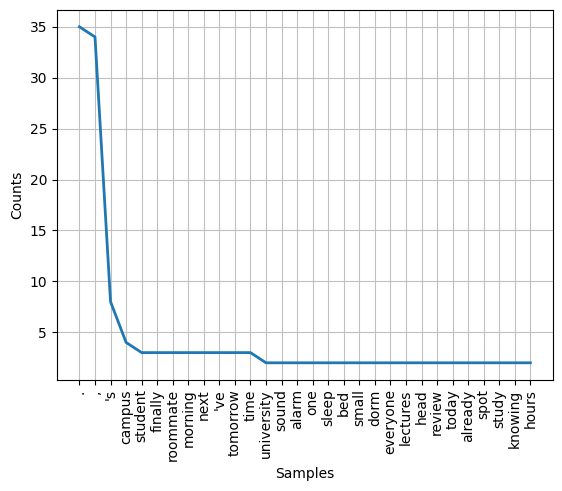

In [37]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [38]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


<Axes: xlabel='Samples', ylabel='Counts'>

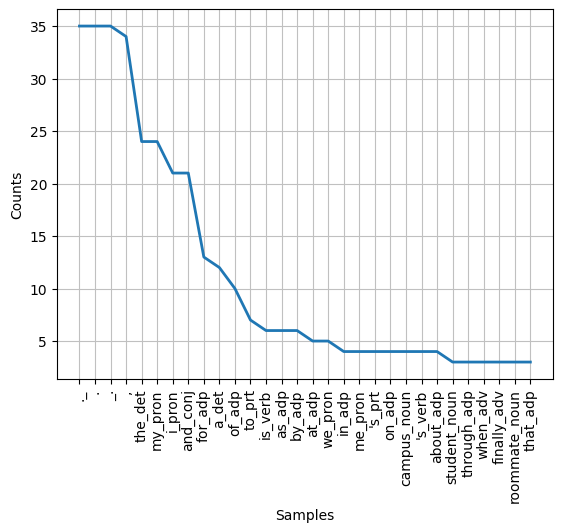

In [39]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

Длина английского текста: 4403 символов
Длина русского текста: 4030 символов
Английский текст:
Способ 1: 407 простых токенов

Топ-10 простых токенов:
gon: 15
hunter: 10
killua: 9
exam: 6
father: 5
game: 5
kurapika: 4
order: 4
nen: 4
manga: 3

Способ 2: 407 токенов с частью речи

Топ-10 токенов с частью речи:
gon_NOUN: 10
killua_NOUN: 8
hunter_NOUN: 6
exam_NOUN: 5
gon_VERB: 5
game_NOUN: 5
order_NOUN: 4
hunter_ADJ: 3
since_ADP: 3
young_ADJ: 3

Способ 3: 407 оставив только леммы и стеммы

Топ-10 лемм/стемм:
gon: 15
hunter: 12
killua: 9
exam: 6
father: 5
game: 5
kurapika: 4
order: 4
nen: 4
manga: 3
Русский текст:
Способ 1: 367 простых токенов

Топ-10 простых токенов:
вниз: 11
алиса: 10
очень: 7
её: 6
это: 4
кролик: 3
падала: 3
начала: 2
картинок: 2
разговоров: 2

Способ 2: 368 токенов с частью речи

Топ-10 токенов с частью речи:
вниз_ADV: 11
алиса_S: 10
очень_ADV: 7
её_SPRO: 4
кролик_S: 3
падала_V: 3
это_SPRO: 3
картинок_S: 2
разговоров_S: 2
подумала_V: 2

Способ 3: 352 оставив только лемм

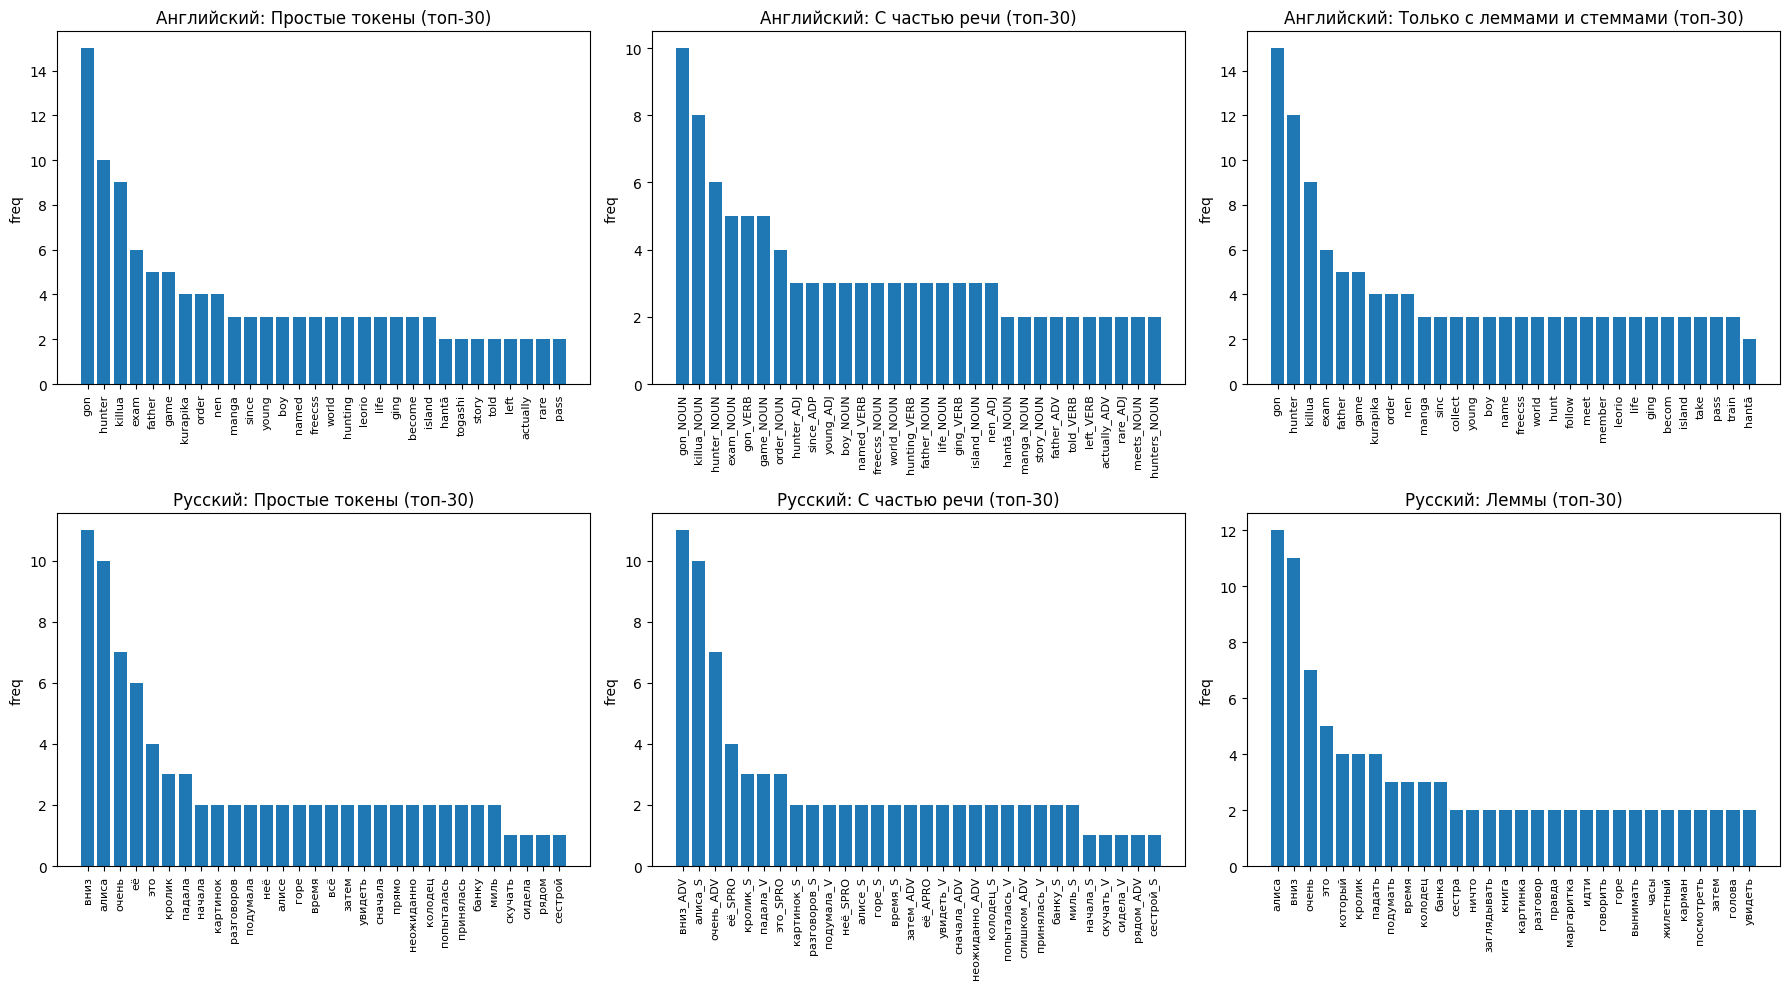

In [62]:
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer, PorterStemmer

mystem = Mystem()

myeng_text = "(Hantā × Hantā), pronounced Hunter Hunter, is a Japanese manga series written and illustrated by Yoshihiro Togashi. It has been serialized in Weekly Shōnen Jump magazine since March 2, 1998, although the manga has frequently gone on extended hiatuses since 2006. As of September 2024, 400 chapters have been collected into 38 tankōbon volumes (chapter collections) by Shueisha in Japan.[3] The story focuses on a young boy named Gon Freecss, who discovers that his father, who he was told had left him at a young age, is actually a world renowned Hunter, a licensed profession for those who specialize in, but are not limited to, fantastic pursuits such as locating rare or unidentified animal species, treasure hunting, surveying unexplored enclaves, or hunting down lawless individuals. Despite being abandoned by his father, Gon departs upon a journey to follow in his footsteps, pass the rigorous Hunter Exam, and eventually find his father. Along the way, Gon meets various other Hunters, including main cast members Kurapika, Leorio, and Killua, and also encounters the paranormal. The original inspiration for the manga came from Togashi's own collecting hobby. The story follows a young boy named Gon Freecss, who was told all his life that both his parents were dead. But when he learns from Kite, an apprentice of his father Ging Freecss, that he is still alive and has since become an accomplished Hunter, Gon leaves his home on Whale Island to take the Hunter Exam in order to become a Hunter like him.[10][11][12] During the exam, Gon meets and soon befriends three of the other applicants: Kurapika, the last remaining member of the Kurta Clan who wishes to become a Hunter in order to avenge his clan and recover their scarlet-glowing eyes that were plucked from their corpses by a band of thieves known as the Phantom Troupe; Leorio, a prospective physician who, in order to pay for medical school, desires the financial benefits that Hunters receive; and Killua Zoldyck, another twelve-year-old boy who has left his former life as a member of the world's most notorious assassin family.[11][12][4] Among many other examinees, Gon continuously encounters Hisoka, a mysterious and deadly Transmuter who takes an interest in him. After passing by many trials together, Gon and his friends end up passing the exam except for Killua, who fails after killing another applicant due to being controlled by his brother, Illumi, and runs away to his family's estate in shame. After Gon and the others convince Killua to rejoin their side, Leorio and Kurapika depart temporarily for their own personal reasons, while Gon and Killua set for the Heavens Arena, a skyscraper where thousands of martial artists compete daily in fighting tournaments, seeking to improve themselves, and gain monetary rewards.[13] There they meet a kung fu (originally kenpō) master named Wing, who trains them in utilizing Nen, a Qi-like life energy used by its practicers to manifest parapsychological abilities, and is also considered to be the final requirement to pass the Hunter Exam. Sometime later, Gon and his friends reunite again in Yorknew City where they have a clash with the Phantom Troupe. During the occasion, Two from the band of thieves are killed by Kurapika and he is forced to give up the chance of hunting down the rest. In order to rescue Gon and Killua, who were captured by them, but not without succeeding in sealing the powers of their leader Chrollo Lucilfer. A few days later, Gon and Killua achieve their objective and begin playing Greed Island, an extremely rare and expensive video game with Nen-like properties following some clues about Ging's whereabouts.[14] While exploring the game, it is revealed that its scenario is actually set somewhere in the real world, created with Nen by none other than Ging himself. Outclassed by the difficulty of the challenges in the game at first, they are soon joined and trained by Biscuit Krueger, an experienced teacher of Nen and kung fu master. With the help of Biscuit, Gon and Killua train their Nen and learn to shape their abilities to their traits. During their stay on Greed Island, Killua takes a short break to apply for the Hunter Exam again, this time passes with success. The trio then complete the game together against all odds and Gon obtains the right to choose the artifacts from the game necessary to reunite with his father."
print(f"Длина английского текста: {len(myeng_text)} символов")
myrus_text = "Алиса начала очень скучать: она сидела рядом с сестрой на берегу и ничего не делала. Раза два она заглянула в книгу, которую читала её сестра, но там не было ни картинок, ни разговоров. И что за польза от книги, — подумала она, — в которой нет разговоров или картинок? Тут она стала размышлять про себя (правда, с трудом, потому что в такой жаркий день чувствовала себя сонной и глупой), стоит ли удовольствие плести венок из маргариток беспокойства идти собирать маргаритки, как вдруг совсем близко от неё пробежал Белый Кролик с розовыми глазами. В этом не было ничего очень уж замечательного. Точно так же Алисе не показалось очень необычным, когда она услышала, как Кролик говорил сам себе: — О горе, горе! Я опоздаю! (Позже Алиса вспоминала об этом, и ей пришло на ум, что она должна была бы удивиться, но в то время всё представлялось ей совершенно естественным.) Когда же Кролик вынул часы из жилетного кармана, посмотрел на них и затем помчался ещё быстрее, Алиса вскочила на ноги, так как в её голове блеснула мысль, что она никогда прежде не встречала кролика ни с жилетным карманом, ни с часами, которые можно было бы вынимать оттуда. Сгорая от любопытства, она бросилась за ним и, к счастью, вовремя, чтобы увидеть, как он внезапно нырнул в большую кроличью нору под изгородью. Кроличья нора сначала шла прямо, подобно туннелю, и затем неожиданно обрывалась вниз, так неожиданно, что Алиса, не имея ни секунды, чтобы остановиться, упала в глубокий колодец. Или колодец был очень глубок, или она падала очень медленно — во всяком случае, у неё было достаточно времени, пока она падала, осматриваться вокруг и гадать, что произойдёт дальше. Сначала Алиса попыталась заглянуть вниз, стараясь понять, куда она падает, но там было слишком темно, чтобы увидеть хоть что-нибудь. Тогда она принялась разглядывать стены колодца и заметила, что на них были буфетные и книжные полки. Здесь и там она видела карты и картины, висящие на колышках. С одной из полок она сняла, летя вниз, банку с наклейкой: АПЕЛЬСИННЫЙ МАРМЕЛАД, но, к её величайшему разочарованию, банка оказалась пустой. Алиса не решилась бросить её, боясь убить кого-нибудь внизу. И она изловчилась и поставила банку в один из буфетов, мимо которого падала. Ну, — подумала Алиса, — после такого падения для меня просто пустяки слететь с лестницы. Какой храброй будут считать меня дома! Да что там! Я не скажу ни словечка, даже если свалюсь с крыши. (Что было очень похоже на правду.) Вниз, вниз, вниз... Кончится ли когда-нибудь падение? — Интересно, сколько миль я успела пролететь за это время? — сказала она громко. — Я, наверное, нахожусь уже где-то неподалёку от центра земли. Посмотрим: это, должно быть, четыре тысячи миль вниз, я думаю. (Потому что, видите ли, Алиса узнала несколько подобных вещей на уроках в классе, и, хотя место не слишком-то позволяло Алисе показывать свои знания — ведь тут не было никого, кто мог её слушать, — всё же сейчас был удобный случай для повторения пройденного.) Да, это приблизительно точное расстояние. А теперь хотелось бы выяснить, какой я достигла Широты и Долготы? (Алиса не имела ни малейшего понятия о том, что такое Широта и Долгота, но она считала очень приятным произносить такие учёные слова.) И она начала снова: — Любопытно, не провалюсь ли я прямо сквозь землю? Как смешно было бы появиться среди людей, ходящих вниз головами! Мне кажется, их зовут антипатиями... (Теперь она, возможно, была даже довольна, что её н и к т о не слышит, так как последнее слово звучало не совсем правильно.) Но мне придётся спросить их: как называется ваша страна? Будьте любезны, мадам! Здесь Новая Зеландия или Австралия?.. (И, говоря так, она попыталась сделать реверанс — вообразите: реверансы в воздухе! Не находите ли вы, что сумели бы проделать это?) Что за невежественная маленькая девочка, подумают они обо мне! Нет, никаким образом не следует спрашивать: может быть, название страны где-нибудь написано. Вниз, вниз, вниз... Так как там больше нечем было заняться, то Алиса вновь принялась разговаривать сама с собой:"
print(f"Длина русского текста: {len(myrus_text)} символов")

stop_words_eng = set(stopwords.words("english"))
stop_words_rus = set(stopwords.words("russian"))

tokens_eng = [
    w for w in word_tokenize(myeng_text.lower())
    if w.isalpha() and w not in stop_words_eng
]
tokens_rus = [
    w for w in word_tokenize(myrus_text.lower())
    if w.isalpha() and w not in stop_words_rus
]

def process_mystem_analysis(analysis_results, stop_words=None):
    result_tokens = []

    for item in analysis_results:
        text = item.get("text", "").lower().strip()

        if not text or not text.isalpha():
            continue
        if stop_words and text in stop_words:
            continue

        if item.get("analysis"):
            first_analysis = item["analysis"][0]
            gr = first_analysis.get("gr")
            if gr:
                pos_tag = gr.split(",")[0].split("=")[0]
                result_tokens.append(f"{text}_{pos_tag}")
            else:
                result_tokens.append(text)

    return result_tokens

print("Английский текст:")

print(f"Способ 1: {len(tokens_eng)} простых токенов")
freq_dist_eng1 = FreqDist(tokens_eng)

print("\nТоп-10 простых токенов:")
for word, freq in freq_dist_eng1.most_common(10):
    print(f"{word}: {freq}")

tagged_eng = nltk.pos_tag(tokens_eng, tagset="universal")
tagged_list_eng = ["_".join(pair) for pair in tagged_eng]

print(f"\nСпособ 2: {len(tagged_list_eng)} токенов с частью речи")

freq_dist_eng2 = FreqDist(tagged_list_eng)

print("\nТоп-10 токенов с частью речи:")
for word, freq in freq_dist_eng2.most_common(10):
    print(f"{word}: {freq}")

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

lemmas_eng = []

for word in tokens_eng: 
    lemma = lemmatizer.lemmatize(word)
    stem = stemmer.stem(lemma)
    lemmas_eng.append(stem)

print(f"\nСпособ 3: {len(lemmas_eng)} оставив только леммы и стеммы")

freq_dist_eng3 = FreqDist(lemmas_eng)

print("\nТоп-10 лемм/стемм:")
for word, freq in freq_dist_eng3.most_common(10):
    print(f"{word}: {freq}")

print("Русский текст:")

tokens_rus = [
    w for w in word_tokenize(myrus_text.lower())
    if w.isalpha() and w not in stop_words_rus
]

print(f"Способ 1: {len(tokens_rus)} простых токенов")

freq_dist_rus_1 = FreqDist(tokens_rus)
print("\nТоп-10 простых токенов:")
for word, freq in freq_dist_rus_1.most_common(10):
    print(f"{word}: {freq}")

text_analyzed_rus = mystem.analyze(myrus_text)
tagged_tokens_rus = process_mystem_analysis(
    text_analyzed_rus,
    stop_words=stop_words_rus
)

print(f"\nСпособ 2: {len(tagged_tokens_rus)} токенов с частью речи")

freq_dist_rus_2 = FreqDist(tagged_tokens_rus)
print("\nТоп-10 токенов с частью речи:")
for word, freq in freq_dist_rus_2.most_common(10):
    print(f"{word}: {freq}")

lemmatized_text = mystem.lemmatize(myrus_text)
lemmas_rus = [
    w for w in lemmatized_text
    if w.isalpha() and w not in stop_words_rus
]

print(f"\nСпособ 3: {len(lemmas_rus)} оставив только леммы")

freq_dist_rus_3 = FreqDist(lemmas_rus)
print("\nТоп-10 лемм:")
for word, freq in freq_dist_rus_3.most_common(10):
    print(f"{word}: {freq}")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

plot_freqdist(axes[0, 0], freq_dist_eng1, 30, "Английский: Простые токены (топ-30)")
plot_freqdist(axes[0, 1], freq_dist_eng2, 30, "Английский: С частью речи (топ-30)")
plot_freqdist(axes[0, 2], freq_dist_eng3, 30, "Английский: Только с леммами и стеммами (топ-30)")

plot_freqdist(axes[1, 0], freq_dist_rus_1, 30, "Русский: Простые токены (топ-30)")
plot_freqdist(axes[1, 1], freq_dist_rus_2, 30, "Русский: С частью речи (топ-30)")
plot_freqdist(axes[1, 2], freq_dist_rus_3, 30, "Русский: Леммы (топ-30)")

plt.tight_layout()
plt.show()
